In [1]:
%load_ext autoreload
%autoreload 2

Classification Testing.

In [19]:
from src.classification import RNNClassifier
from src.parser import Dataset
from src.Config import Constants, Word2VecConfig

In [2]:
dataset = Dataset(fileName = "model.pkl", word2VecLoad = True)

Loaded word2vecEmbedding from /home/devilunraveled/College/Sem6/IntroToNLP/Assignments/WordVectorization/corpus/word2vecEmbedding_3.pkl.


In [3]:
dataset.getData()

Loading data from /home/devilunraveled/College/Sem6/IntroToNLP/Assignments/WordVectorization/corpus/train.csv.
|████████████████████████████████████████| 120000/120000 [100%] in 19.3s (6228.6


In [5]:
print(len(dataset.word2VecEmbedding))

92968


In [ ]:
# Only set this if word2Vec embeddings are not found.
# dataset.setWord2VecEmbeddings()

In [6]:
dataset.getTestData()

Loading test-data from /home/devilunraveled/College/Sem6/IntroToNLP/Assignments/WordVectorization/corpus/test.csv.
|████████████████████████████████████████| 7600/7600 [100%] in 1.2s (6129.12/s) 


In [7]:
trainData = [ (label, tuple(tokenizedSentence)) for label, tokenizedSentence in zip(dataset.labels, dataset.tokenizedData)]
testData = [ (label, tuple(tokenizedSentence)) for label, tokenizedSentence in zip(dataset.testLabels, dataset.testData)]

In [ ]:
# trainData[0][1][1]

In [ ]:
# print(dataset.getWord2VecEmbedding(trainData[0][1][1]))

### Using Word2Vec Embeddings for Classification

In [20]:
classifier = RNNClassifier(inputSize=256, embeddingMap=dataset.getWord2VecEmbedding, 
                           data=trainData, testData=testData, 
                           fileName = f"w2vClassifier_{Word2VecConfig.contextWindow}.pt", learningRate=8e-5)

No model found, building from scratch.
Using cuda as device.


In [9]:
classifier.createDataset()

In [ ]:
print(Word2VecConfig.contextWindow)

In [10]:
# classifier.trainModel()

on 7500: Epoch : 1, Loss : 0.5287752348087728                                   
on 7500: Test Accuracy : 87.82%                                                 
on 7500: Saved model to /home/devilunraveled/College/Sem6/IntroToNLP/Assignments/WordVectorization/pretrained/w2vClassifier_3.pt.
|████████████████████████████████████████| 7500/7500 [100%] in 26.8s (280.80/s) 
on 7500: Epoch : 2, Loss : 0.32220841460352145                                  
on 7500: Test Accuracy : 88.29%                                                 
on 7500: Saved model to /home/devilunraveled/College/Sem6/IntroToNLP/Assignments/WordVectorization/pretrained/w2vClassifier_3.pt.
|████████████████████████████████████████| 7500/7500 [100%] in 26.9s (279.15/s) 
on 7500: Epoch : 3, Loss : 0.28359028423279525                                  
on 7500: Test Accuracy : 89.24%                                                 
on 7500: Saved model to /home/devilunraveled/College/Sem6/IntroToNLP/Assignments/WordVectori

In [18]:
classifier.loadModel(fileName = classifier.fileName)

Loaded model from /home/devilunraveled/College/Sem6/IntroToNLP/Assignments/WordVectorization/pretrained/w2vClassifier_3.pt.


In [12]:
print(f"Best Performing Model with Accuracy : {classifier.evaluation()}")

Best Performing Model with Accuracy : 90.39472961425781


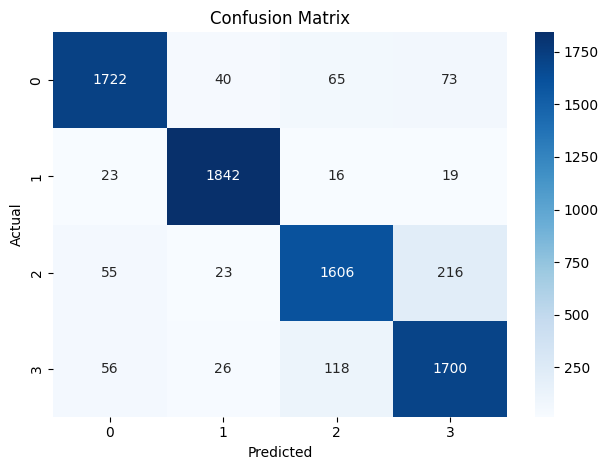

In [13]:
classifier.plotConfusionMatrix(name=f"W2V_{Constants.EmbeddingSize}_{Word2VecConfig.contextWindow}")